In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
url = 'https://drive.google.com/file/d/1_dElPy5hHvvgqvQ9qYgx3JfaGJmXP8cz/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
dataframeN = pd.read_csv(path)
dataframeN2 = pd.read_csv(path)
"""
df = pd.read_csv('heart/HeartDisease.csv')
dataframeN = pd.read_csv('heart/HeartDisease.csv')
dataframeN2 = pd.read_csv('heart/HeartDisease.csv')

"""
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [3]:
df.describe()



,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# NORMALIZACIÓN DE VALORES CUANTITATIVOS

**Normalización**

     MIN - MAX

$$x' = a + \frac{x - min(x)}{max(x)-min(x)} * (b-a)$$

Donde:
- **x** es el dato origial
- **x'** dato normalizado
- **a** valor mínimo deseado
- **b** valor máximo deseado

In [4]:

columna = 'Air temperature [K]'
def minMaxNorma(dataframe,columnaNormalizar):
    maximoDeLosDatos = dataframe[columnaNormalizar].max()
    minimoDeLosDatos = dataframe[columnaNormalizar].min()
    maximoNormalizado = 1
    minimoNormalizado = -1

    rangoDeDatos = maximoDeLosDatos - minimoDeLosDatos
    rangoNormalizado = maximoNormalizado - minimoNormalizado

    p = 0
    for i in dataframe[columnaNormalizar]:
        dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado
        p += 1
    return dataframe


minMaxNorma(dataframeN,columna)
print(dataframeN.head(10))
print(dataframeN.describe())

C:\Users\garci\AppData\Local\Temp\ipykernel_17200\1946600057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M            -0.391304                    308.6   
1    2     L47181    L            -0.369565                    308.7   
2    3     L47182    L            -0.391304                    308.5   
3    4     L47183    L            -0.369565                    308.6   
4    5     L47184    L            -0.369565                    308.7   
5    6     M14865    M            -0.391304                    308.6   
6    7     L47186    L            -0.391304                    308.6   
7    8     L47187    L            -0.391304                    308.6   
8    9     M14868    M            -0.347826                    308.7   
9   10     M14869    M            -0.304348                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3           

**Normalización**

     Normlaización por media

$$x' = \frac{x - \mu}{max(x)-min(x)} $$

Donde:
- **x** es el dato origial
- **x'** dato normalizado
- **$\mu$** es la media del vector de entrada
- **a** valor mínimo deseado
- **b** valor máximo deseado

In [5]:
dataframeN.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.022811,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,0.434839,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,-1.000000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,-0.347826,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,0.043478,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,0.347826,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,1.000000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:

def meanNorma(dataframeN2,columnaNormalizar):
    maximoDeLosDatos = dataframeN2[columnaNormalizar].max()
    minimoDeLosDatos = dataframeN2[columnaNormalizar].min()
    mean = dataframeN2[columnaNormalizar].mean()

    p = 0
    for i in dataframeN2[columnaNormalizar]:
        dataframeN2[columnaNormalizar][p] = ((i-mean)/maximoDeLosDatos-minimoDeLosDatos)
        p += 1
    return dataframeN2

meanNorma(dataframeN2,columna)
print(dataframeN2.head(10))
print(dataframeN2.describe())

C:\Users\garci\AppData\Local\Temp\ipykernel_17200\1685695932.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeN2[columnaNormalizar][p] = ((i-mean)/maximoDeLosDatos-minimoDeLosDatos)


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M          -295.306256                    308.6   
1    2     L47181    L          -295.305928                    308.7   
2    3     L47182    L          -295.306256                    308.5   
3    4     L47183    L          -295.305928                    308.6   
4    5     L47184    L          -295.305928                    308.7   
5    6     M14865    M          -295.306256                    308.6   
6    7     L47186    L          -295.306256                    308.6   
7    8     L47187    L          -295.306256                    308.6   
8    9     M14868    M          -295.305599                    308.7   
9   10     M14869    M          -295.304942                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3           

SinNormalizar
MinMax
Mean


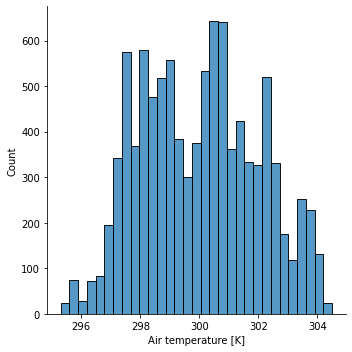

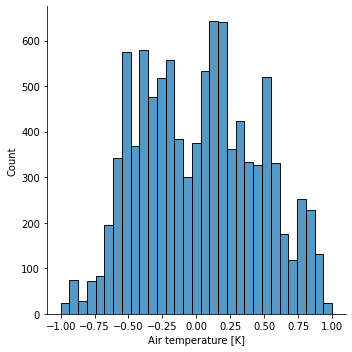

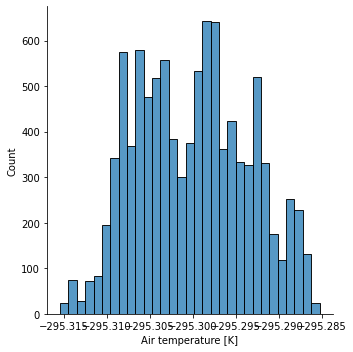

In [7]:
tipoNormalizacion = ['SinNormalizar','MinMax','Mean']
datos = [df["Air temperature [K]"],dataframeN["Air temperature [K]"],dataframeN2["Air temperature [K]"]]
for index in range(len(tipoNormalizacion)):
    print(tipoNormalizacion[index])
    sns.displot(datos[index])


# NORMALIZACIÓN DE VALORES ORDINALES

**Renombrar las columnas**

In [8]:
dataframe = df.copy()
dataframe.rename(mapper={'Air temperature [K]': 'Air_temperature',
                    'Process temperature [K]': 'Process _temperature',
                    'Rotational speed [rpm]': 'Rotational_speed',
                    'Torque [Nm]': 'Torque', 'Failure Type' : 'Failure_Type',
                    'Tool wear [min]': 'Tool_wear'}, axis=1, inplace=True)

**CAMBIAR EL TIPO DE DATO**

In [9]:

dataframe['Tool_wear'] = dataframe['Tool_wear'].astype('float64')
dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
dataframe['Target'] = dataframe['Target'].astype('float64')
del dataframe['Product ID']
print(dataframe)


        UDI Type  Air_temperature  Process _temperature  Rotational_speed  \
0         1    M            298.1                 308.6            1551.0   
1         2    L            298.2                 308.7            1408.0   
2         3    L            298.1                 308.5            1498.0   
3         4    L            298.2                 308.6            1433.0   
4         5    L            298.2                 308.7            1408.0   
...     ...  ...              ...                   ...               ...   
9995   9996    M            298.8                 308.4            1604.0   
9996   9997    H            298.9                 308.4            1632.0   
9997   9998    M            299.0                 308.6            1645.0   
9998   9999    H            299.0                 308.7            1408.0   
9999  10000    M            299.0                 308.7            1500.0   

      Torque  Tool_wear  Target Failure_Type  
0       42.8        0.0     

**NORMALIZAR LOS VALORES ORDINARIOS**

In [10]:
def normOrdinario(dataframe,attr):
  categorias=dataframe[attr].unique()
  diccionario = {}
  index = 1
  for i in categorias:
    diccionario[i] = index
    index +=1
  dataframe[attr].replace(to_replace=diccionario, inplace=True)
  return


normOrdinario(dataframe,'Type')
normOrdinario(dataframe,'Failure_Type')

dataframe['Rotational_speed'] = dataframe['Rotational_speed'].astype('float64')
dataframe['Target'] = dataframe['Target'].astype('float64')
dataframe.dtypes

UDI                       int64
Type                      int64
Air_temperature         float64
Process _temperature    float64
Rotational_speed        float64
Torque                  float64
Tool_wear               float64
Target                  float64
Failure_Type              int64
dtype: object

In [11]:
dataframe['Type'] = dataframe['Type'].astype('float64')
dataframe['Failure_Type'] = dataframe['Failure_Type'].astype('float64')
dataframe.dtypes

UDI                       int64
Type                    float64
Air_temperature         float64
Process _temperature    float64
Rotational_speed        float64
Torque                  float64
Tool_wear               float64
Target                  float64
Failure_Type            float64
dtype: object

In [12]:
dataframe.describe()
#print(df.query("Failure_Type == 5"))
#print(df.query("Type == 2"))

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.80060,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,1.105100
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.628883
min,1.00000,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,1.000000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,1.000000
50%,5000.50000,2.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,1.000000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,1.000000
max,10000.00000,3.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,6.000000


In [13]:
porImputar = dataframe.isna().sum()
print(porImputar)

UDI                     0
Type                    0
Air_temperature         0
Process _temperature    0
Rotational_speed        0
Torque                  0
Tool_wear               0
Target                  0
Failure_Type            0
dtype: int64


In [14]:
dataframe.corr()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
UDI,1.000000,-0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.022649
Type,-0.005529,1.000000,-0.017599,-0.013444,0.002693,-0.004011,0.003930,0.005152,0.014988
Air_temperature,0.117428,-0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.118486
Process _temperature,0.324428,-0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.055579
Rotational_speed,-0.006615,0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,-0.119680
Torque,0.003207,-0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.190346
Tool_wear,-0.010702,0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.082888
Target,-0.022892,0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.828941
Failure_Type,-0.022649,0.014988,0.118486,0.055579,-0.119680,0.190346,0.082888,0.828941,1.000000


In [15]:
def minMaxNorma01(dataframe,columnaNormalizar):
    maximoDeLosDatos = dataframe[columnaNormalizar].max()
    minimoDeLosDatos = dataframe[columnaNormalizar].min()
    maximoNormalizado = 1
    minimoNormalizado = 0

    rangoDeDatos = maximoDeLosDatos - minimoDeLosDatos
    rangoNormalizado = maximoNormalizado - minimoNormalizado

    p = 0
    for i in dataframe[columnaNormalizar]:
        dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado
        p += 1
    return dataframe

minMaxNorma01(dataframe,'Air_temperature')
minMaxNorma01(dataframe,'Process _temperature')
minMaxNorma01(dataframe,'Rotational_speed')

C:\Users\garci\AppData\Local\Temp\ipykernel_17200\297267126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columnaNormalizar][p] = (((i-minimoDeLosDatos)/rangoDeDatos)*rangoNormalizado)+minimoNormalizado


,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,1.0,0.304348,0.358025,0.222934,42.8,0.0,0.0,1.0
1,2,2.0,0.315217,0.370370,0.139697,46.3,3.0,0.0,1.0
2,3,2.0,0.304348,0.345679,0.192084,49.4,5.0,0.0,1.0
3,4,2.0,0.315217,0.358025,0.154249,39.5,7.0,0.0,1.0
4,5,2.0,0.315217,0.370370,0.139697,40.0,9.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,9996,1.0,0.380435,0.333333,0.253783,29.5,14.0,0.0,1.0
9996,9997,3.0,0.391304,0.333333,0.270081,31.8,17.0,0.0,1.0
9997,9998,1.0,0.402174,0.358025,0.277648,33.4,22.0,0.0,1.0
9998,9999,3.0,0.402174,0.370370,0.139697,48.5,25.0,0.0,1.0


In [16]:
dataframe.describe()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.80060,0.511405,0.531551,0.215818,39.986910,107.951000,0.033900,1.105100
std,2886.89568,0.60023,0.217419,0.183177,0.104356,9.968934,63.654147,0.180981,0.628883
min,1.00000,1.00000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,1.000000
25%,2500.75000,1.00000,0.326087,0.382716,0.148428,33.200000,53.000000,0.000000,1.000000
50%,5000.50000,2.00000,0.521739,0.543210,0.194994,40.100000,108.000000,0.000000,1.000000
75%,7500.25000,2.00000,0.673913,0.666667,0.258440,46.800000,162.000000,0.000000,1.000000
max,10000.00000,3.00000,1.000000,1.000000,1.000000,76.600000,253.000000,1.000000,6.000000


In [17]:
dataframe.corr()

,UDI,Type,Air_temperature,Process _temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
UDI,1.000000,-0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,-0.022649
Type,-0.005529,1.000000,-0.017599,-0.013444,0.002693,-0.004011,0.003930,0.005152,0.014988
Air_temperature,0.117428,-0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.118486
Process _temperature,0.324428,-0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.055579
Rotational_speed,-0.006615,0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,-0.119680
Torque,0.003207,-0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,0.190346
Tool_wear,-0.010702,0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.082888
Target,-0.022892,0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.828941
Failure_Type,-0.022649,0.014988,0.118486,0.055579,-0.119680,0.190346,0.082888,0.828941,1.000000


In [34]:
data50 = dataframe.copy()
data10 = dataframe.copy()
data30 = dataframe.copy()

def remove_data(porcentaje,data_frame,attribute_name):
    for _ in range((len(data_frame[attribute_name])*porcentaje)//100):
        data_frame.loc[random.randint(4,len(data_frame[attribute_name]) - 4),attribute_name]=np.nan
    
remove_data(10,data10,"Air_temperature")
remove_data(30,data30,"Air_temperature")
remove_data(100,data50,"Air_temperature")

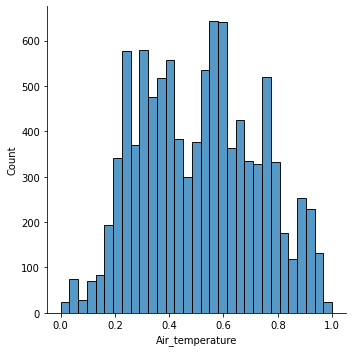

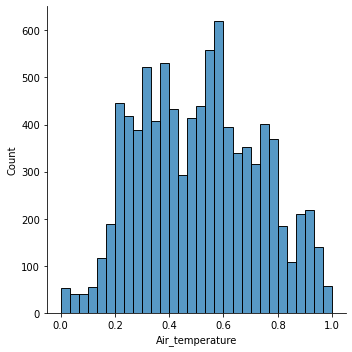

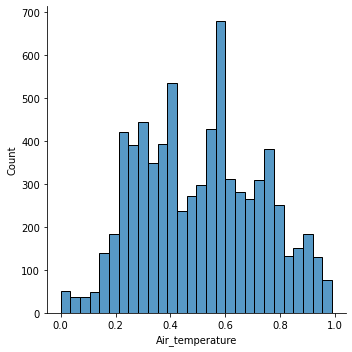

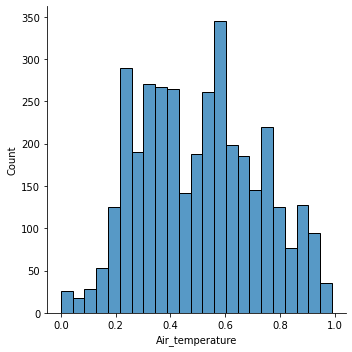

In [35]:
sns.displot(dataframe["Air_temperature"])
sns.displot(data10["Air_temperature"])
sns.displot(data30["Air_temperature"])
sns.displot(data50["Air_temperature"])

In [62]:

def empty_coordinates_attribute(data_frame,attribute_name):
    c=[]
    for i in range(len(data_frame)):
        if pd.isna(data_frame.iloc[i][attribute_name]):
            c.append(i)
    return c

from sklearn.impute import KNNImputer 
def KNN(data_frame,attribute_mising_data,attribute_name):
    distancia=[]
    #Function: return the index of the misising data
    vacias=empty_coordinates_attribute(data_frame,attribute_mising_data)
    #create a list of lists of the distance euclidian 
    for i in range(len(vacias)):
        distancia.append([])
        for j in range(len(data_frame)):
            if vacias[i]==j:
                j=j+1
            else:
                distancia[i].append((data_frame.iloc[vacias[i]][attribute_name] - data_frame.iloc[j][attribute_name])**2)    
    return distancia
    
def impKNN(valor_k,data_frame,attribute_mising_data):
    contador=0
    suma=0
    c=0
    pesos=0
    resultados=[]
    distancia=[]
    distancias_flatten=[]
    lista_suma=[]
    lista_pesos=[]
    resultados_dividida = []
    resultado_ordenado=[]
    resultado_ordenado_valores=[]
    ordenado_k=[]
    promedio=[]
    promedio_k=[]
    #get the name of the attributes
    col=data_frame.columns.tolist()
    #Function: return the index of the misising data
    empty_coor=empty_coordinates_attribute(data_frame,attribute_mising_data)
    
    if len(empty_coor)==0:
        print('No hay valores a imputar')
    
    else:
        
        #create a list of lists of the distance euclidian
        for i in range(len(col)):
            if col[i]==attribute_mising_data:
                i=i+1
            else:
                distancia.append(KNN(data_frame,attribute_mising_data,col[i]))

        #create only one list
        for j in range(len(distancia)):
            for k in range(len(distancia[j])):
                #count the lists
                contador=contador+1
                for l in range(len(distancia[j][k])):
                    distancias_flatten.append(distancia[j][k][l])

        #sum of distances between instances          
        for m in range(contador):
            for n in range(m,len(distancias_flatten),contador):
                if(pd.isna(distancias_flatten[n])):
                    distancias_flatten[n]=0
                    pesos=pesos+1
                    
                suma=suma+distancias_flatten[n]
                c=c+1
                if c==len(distancia):
                    #get the weights
                    lista_suma.append(suma)
                    lista_pesos.append((len(distancia)-pesos)/len(distancia))
                    suma=0
                    pesos=0
                    c=0
        
        for o in range(len(lista_suma)):
            resultados.append((lista_pesos[o],lista_suma[o])*0.5)

        #regroup back into lists
        for p in range(0, len(resultados), len(distancia[0][0])):
            resultados_dividida.append(resultados[p:p+len(distancia[0][0])])

        #sort the lists and get only the indices
        for ordernar in range(len(resultados_dividida)):
            resultado_ordenado.append(np.argsort(resultados_dividida[ordernar]).tolist())
        
        for ind in range(len(resultado_ordenado)):
            resultado_ordenado_valores.append([])
            for indi in range(len(resultado_ordenado[ind])):
                resultado_ordenado_valores[ind].append(resultados_dividida[ind][resultado_ordenado[ind][indi]])            

        # K 
        for r in range(len(resultado_ordenado_valores)):
            promedio.append([])
            for v in range(valor_k):
                promedio[r].append(resultado_ordenado_valores[r][v])
        # promedio K
        for rr in range(len(promedio)):
            promedio_k.append(np.mean(promedio[rr]))
        
        for emp in range(len(empty_coor)):
            data_frame.loc[empty_coor[emp], attribute_mising_data] = round(promedio_k[emp],2)

def impMean(dataf, columna):
    mean = dataf[columna].mean()
    print(mean)
    dataf = dataf.fillna(mean)
    sns.displot(dataf["Air_temperature"])
    return dataf

2591
6326
0       0.304348
1       0.315217
2       0.304348
3       0.315217
4            NaN
          ...   
9995         NaN
9996    0.391304
9997    0.402174
9998    0.402174
9999    0.402174
Name: Air_temperature, Length: 10000, dtype: float64
0       0.304348
1       0.315217
2       0.304348
3       0.315217
4       0.315217
          ...   
9995    0.391304
9996    0.391304
9997    0.402174
9998    0.402174
9999    0.402174
Name: 2, Length: 10000, dtype: float64


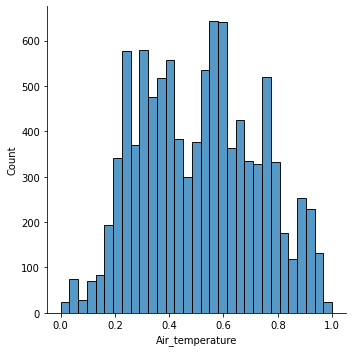

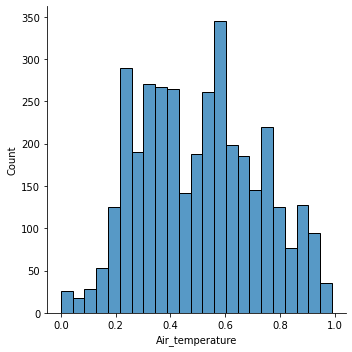

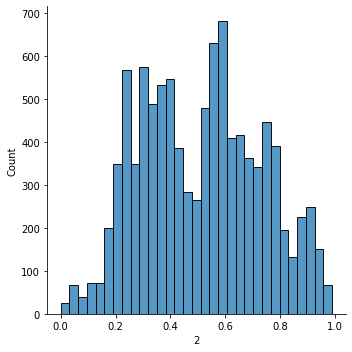

In [52]:

#impKNN(2,data30,"Air_temperature")
imputer = KNNImputer(n_neighbors=1)
afterimp = imputer.fit_transform(data50)
print(data50["Air_temperature"].isna().sum())
data50imp = pd.DataFrame(afterimp)
print(data50["Air_temperature"])
print(data50imp[2])
sns.displot(dataframe["Air_temperature"])
sns.displot(data50["Air_temperature"])
sns.displot(data50imp[2])



942
0       0.304348
1       0.315217
2       0.304348
3       0.315217
4       0.315217
          ...   
9995    0.380435
9996    0.391304
9997    0.402174
9998    0.402174
9999    0.402174
Name: Air_temperature, Length: 10000, dtype: float64
0       0.304348
1       0.315217
2       0.304348
3       0.315217
4       0.315217
          ...   
9995    0.380435
9996    0.391304
9997    0.402174
9998    0.402174
9999    0.402174
Name: 2, Length: 10000, dtype: float64


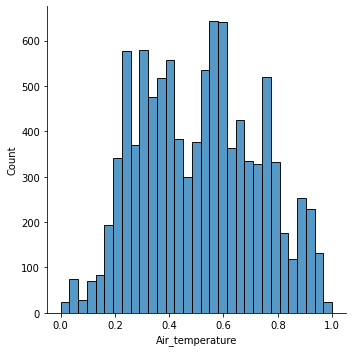

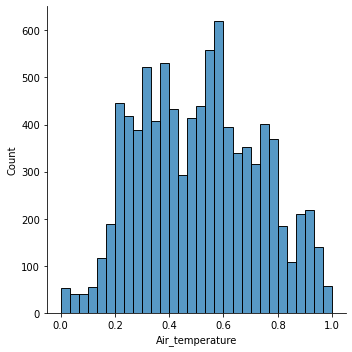

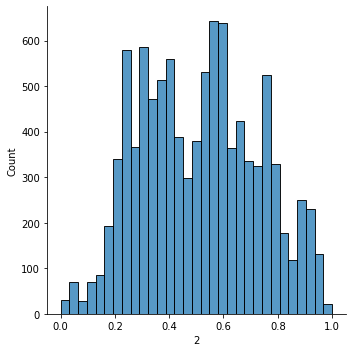

In [68]:
#impKNN(2,data30,"Air_temperature")
imputer = KNNImputer(n_neighbors=1)
afterimp = imputer.fit_transform(data10)
print(data10["Air_temperature"].isna().sum())
data10imp = pd.DataFrame(afterimp)
print(data10["Air_temperature"])
print(data10imp[2])
sns.displot(dataframe["Air_temperature"])
sns.displot(data10["Air_temperature"])
sns.displot(data10imp[2])


942
0.5121943609780443
942


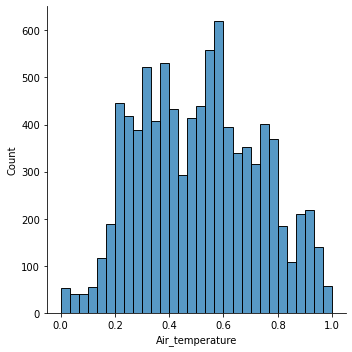

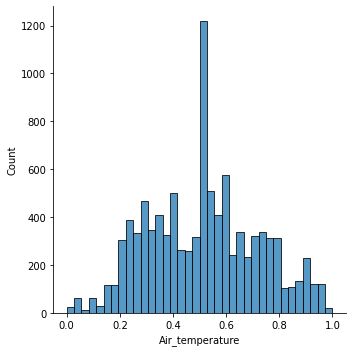

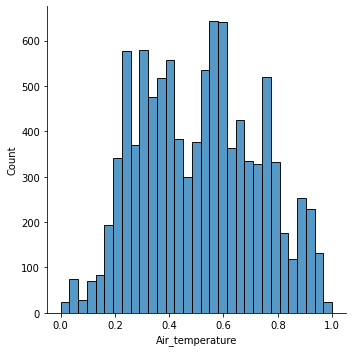

In [64]:
print(data10["Air_temperature"].isna().sum())
sns.displot(data10["Air_temperature"])
impMean(data10,"Air_temperature")
print(data10["Air_temperature"].isna().sum())
sns.displot(dataframe["Air_temperature"])

2591
0.5089990434665236
2591


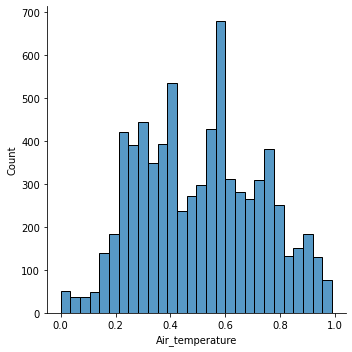

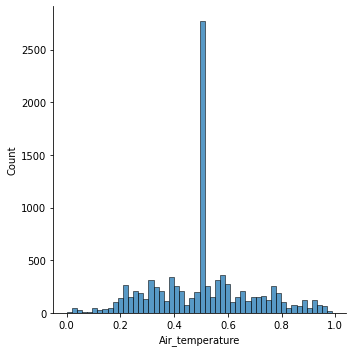

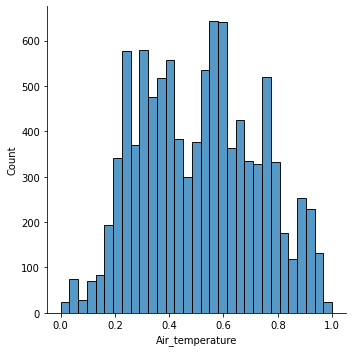

In [67]:
print(data30["Air_temperature"].isna().sum())
sns.displot(data30["Air_temperature"])
impMean(data30,"Air_temperature")
print(data30["Air_temperature"].isna().sum())
sns.displot(dataframe["Air_temperature"])

6326
0.506701024827814
6326


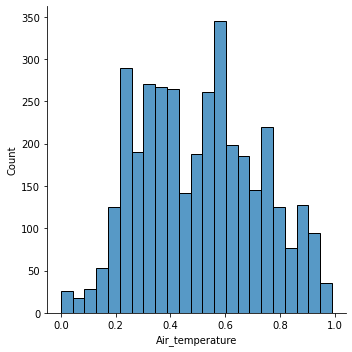

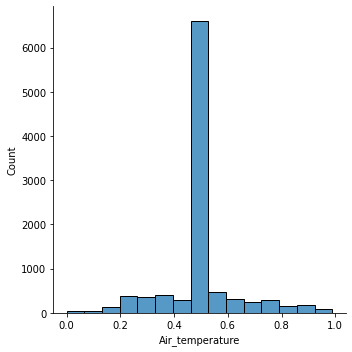

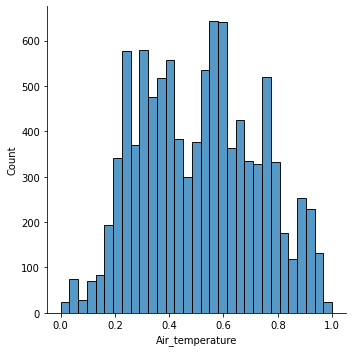

In [66]:
print(data50["Air_temperature"].isna().sum())
sns.displot(data50["Air_temperature"])
impMean(data50,"Air_temperature")
print(data50["Air_temperature"].isna().sum())
sns.displot(dataframe["Air_temperature"])
